<a href="https://colab.research.google.com/github/dhruv4250/customer-segmentation-k-means/blob/main/Customer_Segmentation_CEO_Style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers (3).csv
Total Customers: 200 rows and 5 columns


/tmp/ipython-input-5-3263210131.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


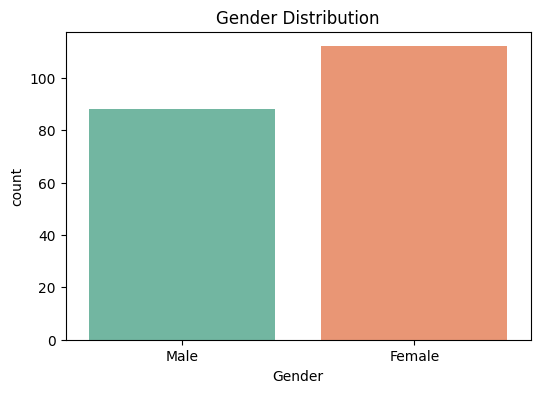

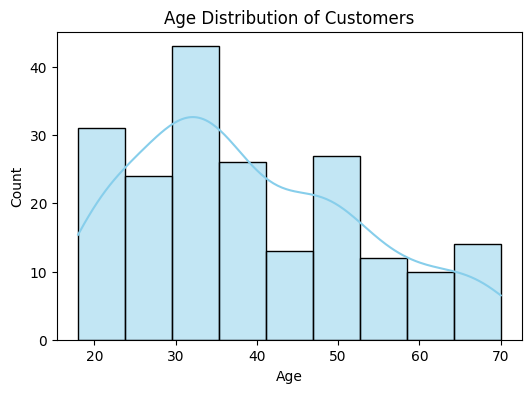

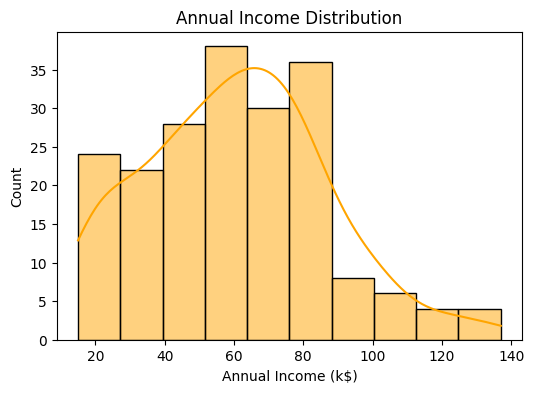

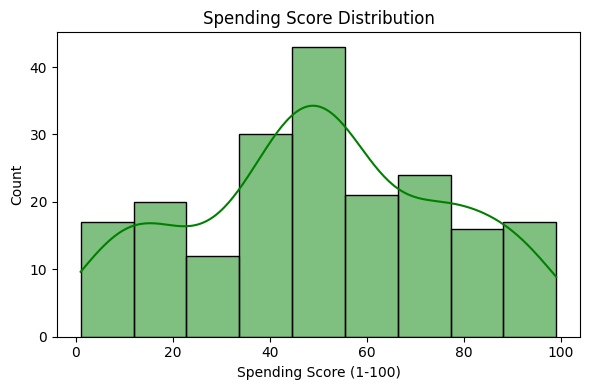

In [5]:
# If not already installed in Colab
!pip install -q seaborn plotly

# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# ⬆️ Upload dataset to Colab
from google.colab import files
uploaded = files.upload()

# 📂 Load the uploaded CSV file
df = pd.read_csv("Mall_Customers.csv")

# 🔍 View the first few rows
df.head()




# Shape of the data
print(f"Total Customers: {df.shape[0]} rows and {df.shape[1]} columns")

# Summary statistics
df.describe()

# Check for nulls
df.isnull().sum()



# 🎂 Gender Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Gender Distribution")

# 📊 Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title("Age Distribution of Customers")

# 💰 Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], kde=True, color='orange')
plt.title("Annual Income Distribution")

# 🧾 Spending Score Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green')
plt.title("Spending Score Distribution")

plt.tight_layout()
plt.show()




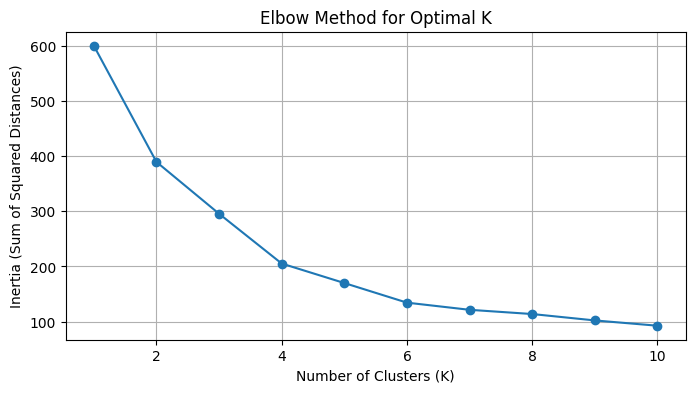

In [7]:
  # 🎯 Select Features
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# ⚖️ Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Show first 5 scaled values
pd.DataFrame(X_scaled, columns=features.columns).head()



# 🚀 Try different K values from 1 to 10
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 📈 Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()


In [8]:
# ✅ Check silhouette score for different K
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"K={k} --> Silhouette Score: {score:.3f}")



K=2 --> Silhouette Score: 0.335
K=3 --> Silhouette Score: 0.358
K=4 --> Silhouette Score: 0.404
K=5 --> Silhouette Score: 0.408
K=6 --> Silhouette Score: 0.431


In [14]:
# 🎯 Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 🔍 View sample result
df.head(50)




,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
5,6,Female,22,17,76,2
6,7,Female,35,18,6,3
7,8,Female,23,18,94,2
8,9,Male,64,19,3,0
9,10,Female,30,19,72,2


In [13]:
# 📊 How many customers in each cluster?
df['Cluster'].value_counts().sort_index()


,count
Cluster,
0,58
1,40
2,26
3,45
4,31


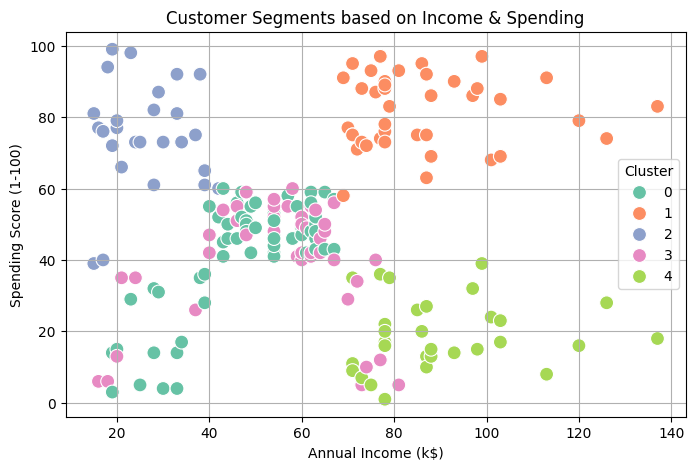

In [15]:
# 🎨 2D plot: Annual Income vs Spending Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments based on Income & Spending")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [16]:
# 🧠 Mapping cluster numbers to business labels (as CEO)
cluster_names = {
    0: 'Luxury High Spenders',
    1: 'Budget-Conscious Shoppers',
    2: 'Young Spontaneous Buyers',
    3: 'Low Income - Low Spend',
    4: 'Steady Mid-Spenders'
}

df['Customer Segment'] = df['Cluster'].map(cluster_names)

# 🎯 View updated data
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Customer Segment']].head()


,Age,Annual Income (k$),Spending Score (1-100),Customer Segment
0,19,15,39,Young Spontaneous Buyers
1,21,15,81,Young Spontaneous Buyers
2,20,16,6,Low Income - Low Spend
3,23,16,77,Young Spontaneous Buyers
4,31,17,40,Young Spontaneous Buyers


In [17]:
# 🧾 Group Summary
summary = df.groupby('Customer Segment')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
summary['Count'] = df['Customer Segment'].value_counts()
summary = summary.reset_index()
summary


,Customer Segment,Age,Annual Income (k$),Spending Score (1-100),Count
0,Budget-Conscious Shoppers,32.9,86.1,81.5,40
1,Low Income - Low Spend,26.7,54.3,40.9,45
2,Luxury High Spenders,55.3,47.6,41.7,58
3,Steady Mid-Spenders,44.4,89.8,18.5,31
4,Young Spontaneous Buyers,25.8,26.1,74.8,26


In [18]:
# 🎯 3D Cluster Plot
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='Customer Segment',
    title="3D View of Customer Segments",
    opacity=0.7
)
fig.show()
